In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model      #使用sklearn库的linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

path=r'C:\Users\Yufei\Desktop\gis_data2.xlsx'#参数初始化
data=pd.read_excel(path)#读取数据
data

,HP,Num_affhouse,Num_stock,Ave_GCSE,Num_offence,Length_Road,Num_job,GVA
0,218639.684167,761,147249.400000,501.5,90.213465,41.264451,140,19139
1,215427.576283,583,148099.000000,508.1,89.840056,41.171429,133,18320
2,221817.152225,284,148806.000000,469.9,84.332287,41.208638,136,18557
3,234439.879467,360,149697.000000,382.1,75.658883,41.264451,126,18449
4,274827.415100,972,150992.000000,390.4,76.598234,41.283055,137,19356
5,307064.079433,273,152515.000000,388.0,76.381615,41.283055,138,18790
6,355846.809333,186,154559.000000,360.0,67.425400,41.283055,140,19210
7,314479.843742,272,103430.158682,411.2,97.284978,145.501326,74,42546
8,326468.341325,479,104173.000000,414.3,101.397042,145.392580,73,43262
9,339685.912767,387,105456.000000,420.3,90.289365,145.501326,77,43683


In [2]:
data.shape

(28, 8)

In [3]:
data.HP.describe()

count        28.000000
mean     348550.033533
std      118575.877685
min      215427.576283
25%      232437.113858
50%      333077.127046
75%      415995.975508
max      608740.907083
Name: HP, dtype: float64

Text(0, 0.5, 'Num_affhouse')

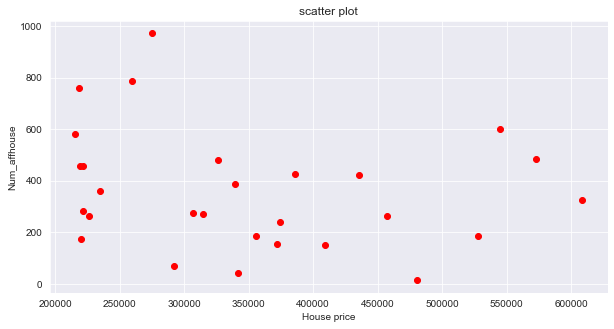

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
# plot a darkgrid with 8*5

plt.scatter(data.HP,data.Num_affhouse,color = 'Red')
plt.title('scatter plot')
plt.xlabel('House price') #name the x axis as "Type of weapon"
plt.ylabel('Num_affhouse')

In [7]:
#Correlation coefficient calculated

rDf_L = data.corr()
print(rDf_L)

#remove Num_offence  due to low correlation

                    HP  Num_affhouse  Num_stock  Ave_GCSE  Num_offence  \
HP            1.000000     -0.213332   0.120158 -0.315654     0.022356   
Num_affhouse -0.213332      1.000000   0.287741  0.160888     0.043544   
Num_stock     0.120158      0.287741   1.000000  0.233972     0.004989   
Ave_GCSE     -0.315654      0.160888   0.233972  1.000000     0.315252   
Num_offence   0.022356      0.043544   0.004989  0.315252     1.000000   
Length_Road   0.805205     -0.201108  -0.092271 -0.004112     0.242070   
Num_job       0.199885      0.264164   0.961254  0.240677    -0.170093   
GVA           0.749708     -0.210972  -0.196897 -0.222971     0.543660   

              Length_Road   Num_job       GVA  
HP               0.805205  0.199885  0.749708  
Num_affhouse    -0.201108  0.264164 -0.210972  
Num_stock       -0.092271  0.961254 -0.196897  
Ave_GCSE        -0.004112  0.240677 -0.222971  
Num_offence      0.242070 -0.170093  0.543660  
Length_Road      1.000000 -0.043642  0.851499

In [9]:
import statsmodels.formula.api as sm
model_L = sm.ols(formula = 'HP ~ Num_affhouse  + Num_stock +  Ave_GCSE + Num_offence + Length_Road+  Num_job +GVA ',data = data).fit()

print(model_L.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     33.50
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.06e-09
Time:                        06:12:01   Log-Likelihood:                -330.74
No. Observations:                  28   AIC:                             677.5
Df Residuals:                      20   BIC:                             688.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.784e+05   1.13e+05      2.455   

In [11]:
#remove Num_offence  due to low correlation
import statsmodels.formula.api as sm
model_L = sm.ols(formula = 'HP ~ Num_affhouse  + Num_stock+ Ave_GCSE +  Length_Road+  Num_job +GVA ',data = data).fit()

print(model_L.summary()) 

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     34.51
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           8.02e-10
Time:                        06:15:35   Log-Likelihood:                -332.96
No. Observations:                  28   AIC:                             679.9
Df Residuals:                      21   BIC:                             689.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.025e+05   9.67e+04      4.163   

In [12]:
#remove Num_affhouse  due to p value
import statsmodels.formula.api as sm
model_L = sm.ols(formula = 'HP ~  Num_stock+ Ave_GCSE +  Length_Road+  Num_job +GVA ',data = data).fit()

print(model_L.summary()) 


                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     40.92
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           2.03e-10
Time:                        06:16:21   Log-Likelihood:                -333.70
No. Observations:                  28   AIC:                             679.4
Df Residuals:                      22   BIC:                             687.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.081e+05   9.68e+04      4.214      